# Present Value of Liabilities and Funding Ratio
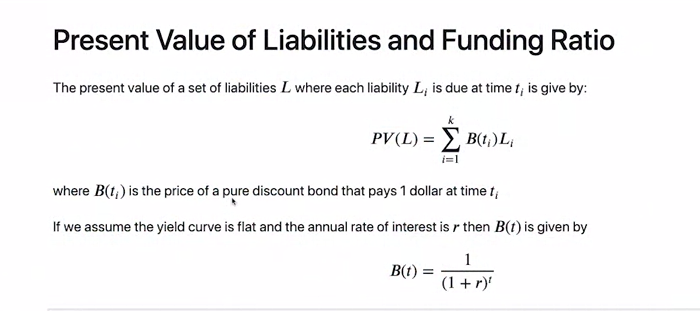

Sum of all liabilities accounting for time value of money 
    Zero coupon bond that pays at time ti 

In [1]:
from sys import path 
path.append('../')
import edhec_risk_kit as erk 

import pandas as pd
import numpy as np
%load_ext autoreload
%autoreload 2

In [3]:
def discount(t, r):
    """
    Compute the price of a pure discount bond that pays a dollar at time t, given interest rate r 
    """
    # return 1 / (1+r)**t 
    return (1+r)**(-t)

In [4]:
discount(10, .03)  # assuming yield curve (current interest rate) is flat/the same

0.7440939148967249

In [5]:
0.7440939148967249*(1.03**10)

1.0

In [12]:
def pv(l, r):
    """
    Computes the present value of a sequence of liabilities 

    l is indexed by the time, and the values are the amounts of each liability
    returns the present value of the squence 
    """
    dates = l.index 
    discounts = discount(dates, r)
    return (discounts*l).sum() 


In [7]:
liabilities = pd.Series(data=[1, 1.5, 2, 2.5], index=[3, 3.5, 4, 4.5])

In [8]:
liabilities
# $1 is due in 3 years 
# $1.5 is due in 3.5 years

3.0    1.0
3.5    1.5
4.0    2.0
4.5    2.5
dtype: float64

In [13]:
pv(liabilities, 0.03)
# while the sum of liabilities is $7 in the future, it's currently worth $6.22

6.233320315080045

In [14]:
liabilities.sum()

7.0

In [17]:
def funding_ratio(assets, liabilities, r):
    """
    Computes the funding ratio of some assets given liabilities and interest rate 
    """
    return assets / pv(liabilities, r)

In [19]:
funding_ratio(5, liabilities, 0.03)
# we get < 1 - means that as of today we don't have enough money to meet the liabilities if you just stick to bonds at 3% interest rate


0.8021407126958777

In [21]:
funding_ratio(5, liabilities, 0.02)  # assumes interest rate goes down - see interest rate gets worse

0.7720304366941648

In [22]:
funding_ratio(5, liabilities, 0.05)

0.8649082768407927

In [25]:
import ipywidgets as widgets
from IPython.display import display
%matplotlib inline 

def show_funding_ratio(assets, r):
    # compute funding ratio
    fr = funding_ratio(assets, liabilities, r)
    print(f'{fr*100:.2f}')

controles = widgets.interactive(show_funding_ratio,
                                assets=widgets.IntSlider(min=1, max=10, steps=1, value=5),
                                r = (0, .20, .01)
                                )
display(controles)

interactive(children=(IntSlider(value=5, description='assets', max=10, min=1), FloatSlider(value=0.1, descript…